# this is a baseliine notebook... with some stuff that can be built upon (TODOS)
 - Basic EDA
 - model training
 

Loading spacy models for some feature engineering later on 

In [ ]:
!python -m spacy download en_core_web_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 400.7 MB 5.7 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import missingno as mno
import pandas as pd
import numpy as np
import spacy
from sklearn.preprocessing import LabelEncoder

In [ ]:

train = pd.read_csv(r'/content/gdrive/My Drive/alvin-smart/Train.csv')
test = pd.read_csv(r'/content/gdrive/My Drive/alvin-smart/Test.csv')
ss = pd.read_csv(r'/content/gdrive/My Drive/alvin-smart/SampleSubmission.csv')
extra_data = pd.read_csv(r'/content/gdrive/My Drive/alvin-smart/extra_data.csv')
vd = pd.read_csv(r'/content/gdrive/My Drive/alvin-smart/VariableDefinitions.csv')

# EDA


In [ ]:
train_id = train.pop('Transaction_ID')
test_id = test.pop('Transaction_ID')

In [ ]:
train.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K
1,2021-10-25 16:18:38.586837+00,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,2022-05-27 12:46:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K
3,2022-04-12 15:59:14.139347+00,ZILLIONS CREDIT LIMITED,Loan Repayment,3800,2022-02-07 12:16:00+00,False,NaN,Male,5,252000,ID_3JA0MAFB
4,2022-05-04 10:24:26.709045+00,MICHAEL MUSEMBI,Bills & Fees,60,2022-05-04 15:28:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MERCHANT_CATEGORIZED_AT                373 non-null    object 
 1   MERCHANT_NAME                          373 non-null    object 
 2   MERCHANT_CATEGORIZED_AS                373 non-null    object 
 3   PURCHASE_VALUE                         373 non-null    int64  
 4   PURCHASED_AT                           373 non-null    object 
 5   IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY  373 non-null    bool   
 6   USER_AGE                               61 non-null     float64
 7   USER_GENDER                            367 non-null    object 
 8   USER_HOUSEHOLD                         373 non-null    int64  
 9   USER_INCOME                            373 non-null    int64  
 10  USER_ID                                373 non-null    object 
dtypes: boo

In [ ]:
len(train['MERCHANT_CATEGORIZED_AS'].value_counts()) , train['MERCHANT_CATEGORIZED_AS'].value_counts() 

(13, Bills & Fees        78
 Groceries           50
 Data & WiFi         43
 Miscellaneous       43
 Family & Friends    41
 Going out           41
 Transport & Fuel    29
 Shopping            21
 Emergency fund      12
 Health               6
 Loan Repayment       5
 Rent / Mortgage      2
 Education            2
 Name: MERCHANT_CATEGORIZED_AS, dtype: int64)

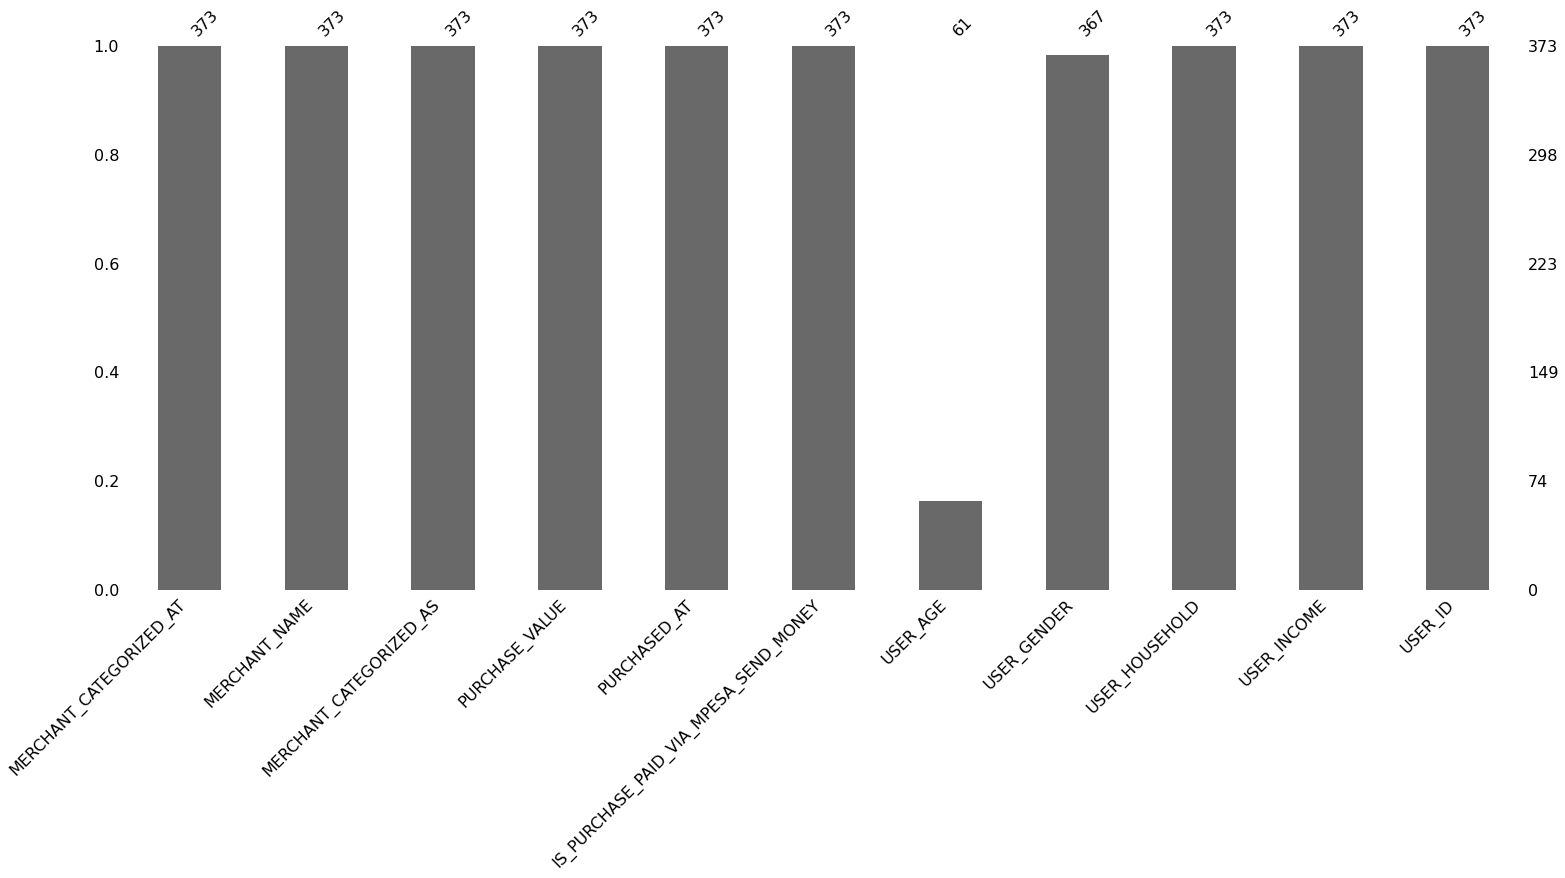

In [ ]:
mno.bar(train)

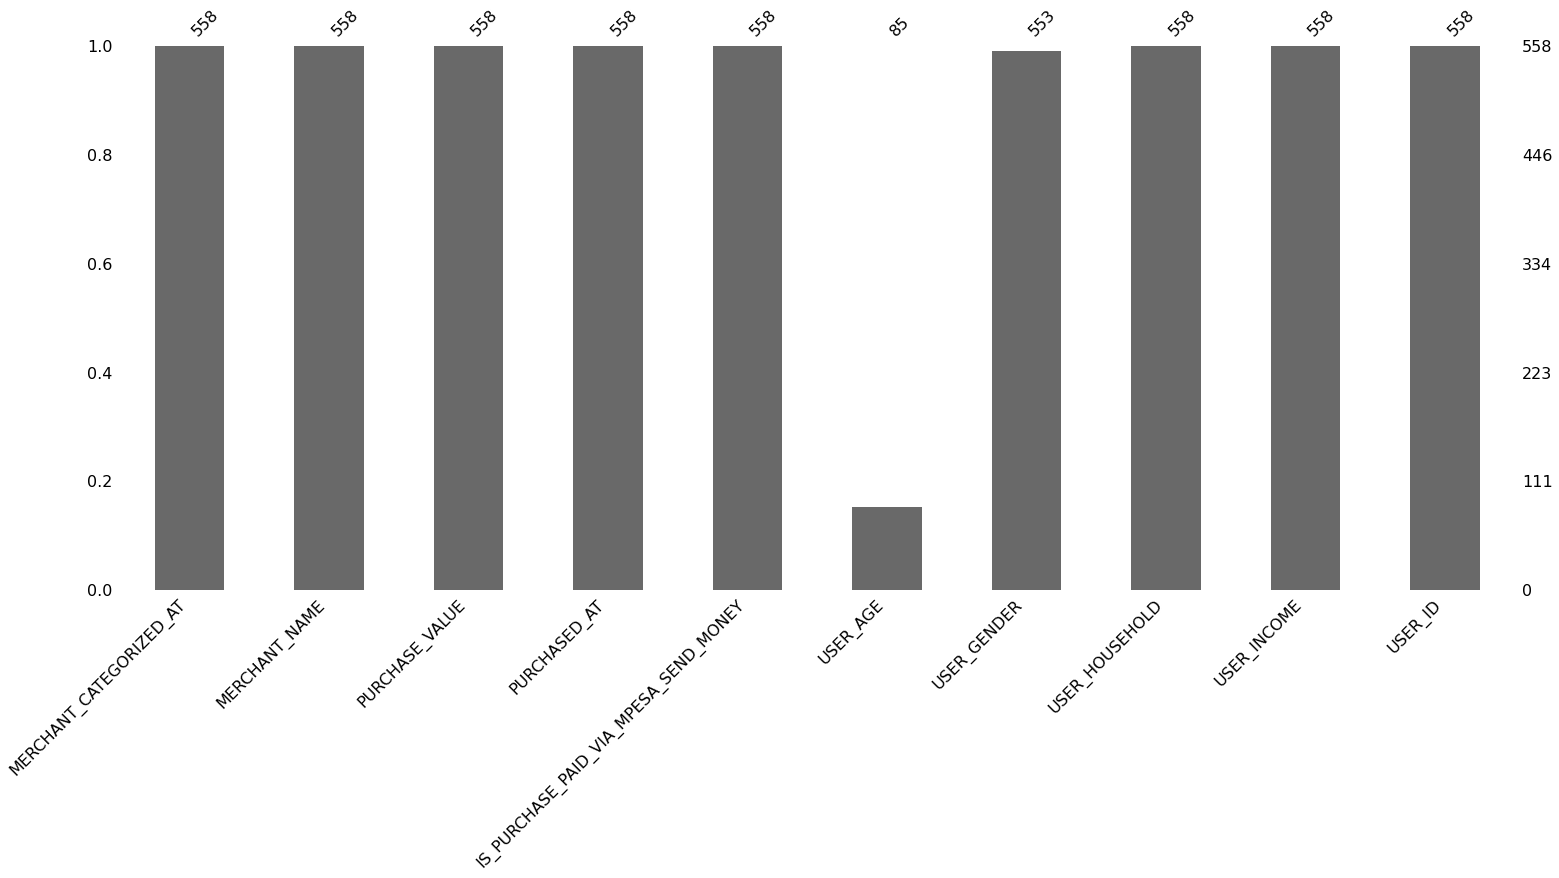

In [ ]:
mno.bar(test)

In [ ]:
len(train) , len(test)

(373, 558)

In [ ]:
train['MERCHANT_NAME'].value_counts()[:30]

SAFARICOM OFFERS  TUNUKIWA     14
M-SHWARI ACCOUNT               12
PETER KENDA                    10
SAFARICOM LIMITED              10
EQUITY PAYBILL ACCOUNT          8
KPLC PREPAID                    8
CARREFOUR SRT                   7
LEAH NGOGA                      7
SAFARICOM HOME                  6
FATUMA OSORE                    6
SAFARICOM POST PAID             5
ELIZABETH NYAMBURA              5
JACKSON ANDIVA                  4
RAPHAEL MWANGI                  4
NHIF                            4
KAPS PARKING                    4
JERUSA OTIENO                   4
CEDRIC OCHOLA                   4
TELKOM KENYA LIMITED            4
PETER NJOORA KENDA              3
DENIS OTIENO                    3
KILELESHWA SUPERSHINE           3
TEOFILO LIGAWA                  3
OILIBYA WAIYAKI                 3
VENDIT LIMITED                  3
TUSKYS -T MALL                  3
KUNE FOOD LAB KENYA LIMITED     3
ENVY VIVA CORPORATE             3
NAIVAS                          2
JOHN NJIRU GAK

In [ ]:
labels = train.pop('MERCHANT_CATEGORIZED_AS')

# Feature engineering.
- using the spacy moodel downloaded earlier to create newe features(By getting the labels entity)

In [ ]:
def add_labels(data):
  """ Getting the entity .labels_ from columns using spacy model"""

  nlp = spacy.load('en_core_web_lg')
  new_data = data.copy()
  #TODO get more accurate labels and see if the label type impacts the models performance
  #TODO : make all values that are not ORG or PERSON either an ORG or PERSON or just put them in new value called "other"
  new_data['MERCHANT_NAME'] = new_data['MERCHANT_NAME'].apply(str.lower)
  wds = []
  for i in range(len(new_data)):
    for words in nlp(new_data['MERCHANT_NAME'][i]).ents:
      wds.append(words.label_)
      
  new_data['Labels']  = pd.DataFrame(wds)[0]
  #TODO : find a way to replace values without using a for loop
  if len(new_data) > 500:
    #should return column with 4 values : ['PERSON' , 'ORG' , 'other', nan]
    new_data['Labels'] = new_data['Labels'].replace(['CARDINAL', 'GPE', 'PRODUCT', 'FAC'] , 'other')
  else:
    new_data['Labels'] = new_data['Labels'].replace(['CARDINAL', 'GPE', 'PRODUCT'] , 'other')
  return new_data

In [ ]:
#depending on whether the words are uppercase or lowercase the .label_ changes
test = add_labels(test)
train = add_labels(train)

In [ ]:
print('{:.1f} of the data is missing in test'.format((test['Labels'].isna().sum() / len(test))*100))
print('{:.1f} of the data is missing in train'.format((train['Labels'].isna().sum() / len(train))*100))

23.3 of the data is missing in test
26.3 of the data is missing in train


# Extraxting more info from time data

 - In terms of dealing with missing values I plan to do... Nothing. I feel like xgboost or lightgbm will do the trick, because both lightgbm and xgboost handle missing values by default if not I will have to fill them in. Ecspecially if you want to ensemble multiple models together

- Also getting what time of day it is(morning,nooon..)

- frequency of certain columns

In [ ]:
def trans_to_date(data):
  """ Convert columns to datetime format """
  new_data = data.copy()
  new_data['MERCHANT_CATEGORIZED_AT']= pd.to_datetime(new_data['MERCHANT_CATEGORIZED_AT'])
  new_data['PURCHASED_AT']= pd.to_datetime(new_data['PURCHASED_AT'])

  return new_data

train = trans_to_date(train)
test = trans_to_date(test)

In [ ]:
le = LabelEncoder()

def make_encoder(data):
  """Funtion to encode columns that are objects """
  
  data_copy = data.copy()
  #data_copy = data_copy['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'].astype('O')
  for col in data_copy.columns:
    if (data_copy[col].dtype == 'O') or (data_copy[col].dtype == 'bool'):
      data_copy[col] = le.fit_transform(data_copy[col])
  return data_copy

In [ ]:
#transforming target variables
labels = le.fit_transform(labels)

In [ ]:
train = make_encoder(train)
test = make_encoder(test)
test.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Labels
0,2022-06-01 10:25:16.713100+00:00,145,150000,2022-05-05 08:29:00+00:00,1,NaN,1,5,150000,20,1
1,2022-03-16 13:05:51.851102+00:00,107,7394,2019-10-05 16:02:00+00:00,0,NaN,0,1,10000,5,0
2,2022-03-10 18:25:42.112294+00:00,127,200,2021-11-25 09:56:00+00:00,0,NaN,0,1,85000,2,1
3,2022-04-12 15:59:14.139347+00:00,297,50,2022-04-11 14:48:00+00:00,0,NaN,1,2,10000,15,0
4,2022-05-04 10:24:26.709045+00:00,166,10000,2022-05-04 13:59:00+00:00,0,NaN,1,3,10000,29,0


In [ ]:
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'


In [ ]:
def get_time_diff(data):
  """ Getting what time of day it was, noon,morning... and the diff in minutes
      from purchased_at and merechant_categorized_at"""
  new_data = data.copy()
  new_data['merchant_cat_at_time_of_day'] = new_data['MERCHANT_CATEGORIZED_AT'].dt.hour.apply(f)
  new_data['purchased_at_time_of_day'] = new_data['PURCHASED_AT'].dt.hour.apply(f)
  new_data['diff_minutes'] = np.absolute(new_data['PURCHASED_AT'] - new_data['MERCHANT_CATEGORIZED_AT']).astype('timedelta64[m]')
  new_data.drop('PURCHASED_AT',1,inplace=True)
  new_data.drop('MERCHANT_CATEGORIZED_AT',1,inplace=True)
  return new_data

test = get_time_diff(test)
train = get_time_diff(train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


In [ ]:
train = make_encoder(train)
test = make_encoder(test)
train.head()

,MERCHANT_NAME,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Labels,merchant_cat_at_time_of_day,purchased_at_time_of_day,diff_minutes
0,206,1700,0,NaN,1,3,10000,24,0,3,5,210.0
1,150,100,0,25.0,0,4,90000,20,0,4,5,1566.0
2,175,20,0,NaN,1,3,10000,24,0,4,3,9988.0
3,215,3800,0,NaN,1,5,252000,2,2,4,3,92383.0
4,113,60,0,NaN,1,3,10000,24,1,3,5,303.0


In [ ]:
def columns_groups_freq(dataset , main_column , sec_column=None ):
    col_used = []
    data = dataset.copy()
    """ Getting country freq and country+column freq
    """
    
    if sec_column:
        data[f'{main_column}'+'_'+f'{sec_column}'+'_freq'] = (data.groupby([f'{main_column}' , f'{sec_column}'])[f'{sec_column}'].transform('count') / data[f'{main_column}'].count()).round(3)

    else:
        data[f'{main_column}'+'_freq'] = (data.groupby(f'{main_column}')[f'{main_column}'].transform('count') / train[f'{main_column}'].count()).round(3)
        
    #col_used.append(column)
    #if drop_used_col == True:
    #    data.drop(column , 1, inplace=True)
    return data
    
    

In [ ]:
def mean_std_columns(dataset ,trans_column , main_column , sec_column=None):
    
    """ main_column & sec_column --> columns we will be grouping data by sec_column(optional)
        trans_col --> column we will apply transformation too eg(mean,std,max)
    """ 
    data = dataset.copy()
    if sec_column:
        data[f'{main_column}_'+f'{sec_column}'+f'_{trans_column}'+'_mean'] = (data.groupby([f'{main_column}' , f'{sec_column}'])[f'{trans_column}'].transform('mean')).round(3)
        data[f'{main_column}_'+f'{sec_column}'+f'_{trans_column}'+'_std'] = (data.groupby([f'{main_column}' , f'{sec_column}'])[f'{trans_column}'].transform('std')).round(3)
        data[f'{main_column}_'+f'{sec_column}'+f'_{trans_column}'+'_max'] = (data.groupby([f'{main_column}' , f'{sec_column}'])[f'{trans_column}'].transform('max')).round(3)
        
    else:
        data[f'{main_column}_'+f'{trans_column}'+'_mean'] = (data.groupby(f'{main_column}')[f'{trans_column}'].transform('mean')).round(3)
        data[f'{main_column}_'+f'{trans_column}'+'_std'] = (data.groupby(f'{main_column}')[f'{trans_column}'].transform('std')).round(3)
        data[f'{main_column}_'+f'{trans_column}'+'_max'] = (data.groupby(f'{main_column}')[f'{trans_column}'].transform('max')).round(3)
        
    return data

- #TODO : check whether appending test to train affects the models performance after feature engineering

- #try to make USER_INCOME in a category


In [ ]:
train = columns_groups_freq(train , 'MERCHANT_NAME' )
test = columns_groups_freq(test , 'MERCHANT_NAME' )

train = columns_groups_freq(train , 'USER_HOUSEHOLD' )
test = columns_groups_freq(test , 'USER_HOUSEHOLD' )

train = columns_groups_freq(train , 'USER_AGE' )
test = columns_groups_freq(test , 'USER_AGE' )

train = columns_groups_freq(train , 'USER_ID' )
test = columns_groups_freq(test , 'USER_ID' )

In [ ]:
train = mean_std_columns(train , 'diff_minutes' , 'MERCHANT_NAME')
test = mean_std_columns(test , 'diff_minutes' , 'MERCHANT_NAME')

train = mean_std_columns(train,'PURCHASE_VALUE' , 'USER_HOUSEHOLD')
test = mean_std_columns(test ,'PURCHASE_VALUE' , 'USER_HOUSEHOLD')

train = mean_std_columns(train,'PURCHASE_VALUE' , 'MERCHANT_NAME')
test = mean_std_columns(test ,'PURCHASE_VALUE' , 'MERCHANT_NAME')

In [ ]:
#For variation of data drop the columns used above
#drop_cols = ['MERCHANT_NAME' , 'USER_HOUSEHOLD' , 'USER_AGE' , 'USER_ID' , 'diff_minutes' , 'PURCHASE_VALUE' ]
#test.drop(drop_cols,1,inplace=True)
#train.drop(drop_cols,1,inplace=True)

## normalize or standardize? I will leave that to you lightgbm doesnt need to explicity be normalized

In [ ]:
cor_train = train.copy()
cor_train['labels'] = labels
corr = cor_train.corr()

corr.style.background_gradient(cmap='coolwarm')

,MERCHANT_NAME,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Labels,merchant_cat_at_time_of_day,purchased_at_time_of_day,diff_minutes,MERCHANT_NAME_freq,USER_HOUSEHOLD_freq,USER_AGE_freq,USER_ID_freq,MERCHANT_NAME_diff_minutes_mean,MERCHANT_NAME_diff_minutes_std,MERCHANT_NAME_diff_minutes_max,USER_HOUSEHOLD_PURCHASE_VALUE_mean,USER_HOUSEHOLD_PURCHASE_VALUE_std,USER_HOUSEHOLD_PURCHASE_VALUE_max,MERCHANT_NAME_PURCHASE_VALUE_mean,MERCHANT_NAME_PURCHASE_VALUE_std,MERCHANT_NAME_PURCHASE_VALUE_max,labels
MERCHANT_NAME,1.000000,-0.128728,-0.137353,-0.072736,0.063521,0.036538,0.017792,-0.115586,0.035574,0.067104,-0.078286,0.103888,0.128381,0.003602,-0.015185,0.085634,0.112720,0.319471,0.206825,0.034732,0.021090,-0.001560,-0.151356,-0.226657,-0.156201,0.070713
PURCHASE_VALUE,-0.128728,1.000000,0.073517,0.087502,0.052631,0.011000,0.106300,-0.098802,0.044820,-0.097735,0.008345,0.140951,-0.023845,0.021139,0.031683,-0.014262,0.140962,-0.023227,0.086159,0.149720,0.108761,0.050393,0.850495,0.329764,0.497132,-0.074565
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,-0.137353,0.073517,1.000000,0.378800,-0.135194,-0.118876,0.041786,-0.060762,0.032493,-0.073209,-0.193701,0.135423,-0.082089,0.069259,-0.474995,-0.094513,0.147260,0.065625,0.095130,-0.044096,-0.036363,0.031129,0.085914,-0.127947,-0.061403,-0.086870
USER_AGE,-0.072736,0.087502,0.378800,1.000000,nan,-0.512470,-0.212903,-0.879391,0.145574,-0.141827,-0.173815,-0.046036,-0.148590,0.258093,-0.770966,-0.772481,-0.028462,0.339894,-0.013076,0.095383,0.265224,0.220689,0.248982,-0.290870,-0.023902,0.143406
USER_GENDER,0.063521,0.052631,-0.135194,nan,1.000000,0.442852,0.234437,0.012878,0.032038,-0.059477,0.024431,-0.292434,0.024833,-0.067284,nan,-0.013147,-0.268361,-0.091190,-0.221512,0.030640,0.135947,-0.029618,0.045042,-0.037638,-0.014331,-0.066864
USER_HOUSEHOLD,0.036538,0.011000,-0.118876,-0.512470,0.442852,1.000000,0.523175,-0.068304,-0.028217,0.006491,0.008027,-0.277246,-0.101422,-0.659054,0.940572,0.104732,-0.254730,-0.176450,-0.263252,0.073468,-0.254379,-0.607741,0.006500,-0.036876,-0.057898,-0.012197
USER_INCOME,0.017792,0.106300,0.041786,-0.212903,0.234437,0.523175,1.000000,-0.379732,0.025122,-0.059468,-0.090861,-0.085273,-0.080742,-0.193516,0.672961,-0.112794,-0.081767,0.005690,-0.069737,0.406217,0.045668,-0.219265,0.060105,-0.013074,-0.040932,0.041954
USER_ID,-0.115586,-0.098802,-0.060762,-0.879391,0.012878,-0.068304,-0.379732,1.000000,-0.001211,-0.051104,0.097980,-0.324812,0.111261,-0.131099,0.519693,-0.362026,-0.343051,-0.435737,-0.375579,-0.089761,0.049792,0.024117,-0.097532,0.135766,0.066313,-0.234674
Labels,0.035574,0.044820,0.032493,0.145574,0.032038,-0.028217,0.025122,-0.001211,1.000000,-0.029478,-0.078248,0.032352,0.019218,0.058058,-0.095633,-0.103480,0.019709,-0.070756,0.025243,-0.006096,-0.000493,0.019036,0.047665,-0.069838,-0.004985,-0.039567
merchant_cat_at_time_of_day,0.067104,-0.097735,-0.073209,-0.141827,-0.059477,0.006491,-0.059468,-0.051104,-0.029478,1.000000,-0.023062,0.119672,0.029697,-0.013942,0.241182,-0.096574,0.108328,-0.061784,0.049132,-0.276361,-0.317502,-0.182425,-0.151958,-0.160228,-0.108326,-0.027415


In [ ]:
del cor_train

# Modeling

In [ ]:
import lightgbm as lgbm

In [ ]:
params = {
    'objective': "logloss",
    'learning_rate': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'random_state': 42,

    'max_depth': 9,   
    'num_leaves': 35, 
    'n_estimators': 10000, 
    "colsample_bytree": 0.9,
}

base_model = lgbm.LGBMClassifier()

In [ ]:
base_model.fit(train , labels)
from sklearn.metrics import log_loss
log_loss(labels , base_model.predict_proba(train))

0.049555313922835006

In [ ]:
preds = base_model.predict_proba(test)
preds = pd.DataFrame(preds)
preds

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.756499,0.044587,0.003229,0.042679,0.101303,0.001393,0.017252,0.000724,0.001048,0.004180,0.003860,0.002858,0.020390
1,0.046286,0.004376,0.000084,0.005238,0.005581,0.899903,0.007415,0.000326,0.000794,0.017507,0.000246,0.010750,0.001495
2,0.000938,0.001103,0.000011,0.000114,0.001709,0.047966,0.361381,0.000031,0.000034,0.003385,0.000027,0.006180,0.577122
3,0.091274,0.003975,0.000057,0.009043,0.008760,0.071058,0.021677,0.000384,0.000139,0.463188,0.001157,0.238035,0.091255
4,0.069035,0.373926,0.000358,0.034698,0.017050,0.007193,0.186759,0.000823,0.005699,0.014134,0.265389,0.018106,0.006831
...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,0.006755,0.001848,0.000044,0.003236,0.000817,0.958319,0.007625,0.000035,0.000530,0.012423,0.000829,0.004435,0.003103
554,0.035065,0.214050,0.000180,0.001086,0.104435,0.010760,0.020610,0.003160,0.021826,0.012784,0.000181,0.003990,0.571873
555,0.147482,0.043075,0.000756,0.001213,0.003639,0.581820,0.025001,0.002014,0.000678,0.009109,0.000113,0.002726,0.182373
556,0.018150,0.001804,0.000124,0.007888,0.969951,0.000397,0.000685,0.000062,0.000045,0.000496,0.000033,0.000144,0.000222


In [ ]:
preds['Transaction_ID'] = test_id
preds

,0,1,2,3,4,5,6,7,8,9,10,11,12,Transaction_ID
0,0.756499,0.044587,0.003229,0.042679,0.101303,0.001393,0.017252,0.000724,0.001048,0.004180,0.003860,0.002858,0.020390,ID_00x9h2yx
1,0.046286,0.004376,0.000084,0.005238,0.005581,0.899903,0.007415,0.000326,0.000794,0.017507,0.000246,0.010750,0.001495,ID_01db594f
2,0.000938,0.001103,0.000011,0.000114,0.001709,0.047966,0.361381,0.000031,0.000034,0.003385,0.000027,0.006180,0.577122,ID_07pm99no
3,0.091274,0.003975,0.000057,0.009043,0.008760,0.071058,0.021677,0.000384,0.000139,0.463188,0.001157,0.238035,0.091255,ID_09jryhkd
4,0.069035,0.373926,0.000358,0.034698,0.017050,0.007193,0.186759,0.000823,0.005699,0.014134,0.265389,0.018106,0.006831,ID_0ccv924c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,0.006755,0.001848,0.000044,0.003236,0.000817,0.958319,0.007625,0.000035,0.000530,0.012423,0.000829,0.004435,0.003103,ID_zvole537
554,0.035065,0.214050,0.000180,0.001086,0.104435,0.010760,0.020610,0.003160,0.021826,0.012784,0.000181,0.003990,0.571873,ID_zy4igt1w
555,0.147482,0.043075,0.000756,0.001213,0.003639,0.581820,0.025001,0.002014,0.000678,0.009109,0.000113,0.002726,0.182373,ID_zy4urqmq
556,0.018150,0.001804,0.000124,0.007888,0.969951,0.000397,0.000685,0.000062,0.000045,0.000496,0.000033,0.000144,0.000222,ID_zym0pkxl


In [ ]:
ss.columns

Index(['Transaction_ID', 'Bills & Fees', 'Data & WiFi', 'Education',
       'Emergency fund', 'Family & Friends', 'Going out', 'Groceries',
       'Health', 'Loan Repayment', 'Miscellaneous', 'Rent / Mortgage',
       'Shopping', 'Transport & Fuel'],
      dtype='object')

# Submission

In [ ]:
preds = preds.rename(columns = {0 : 'Bills & Fees' , 1 : 'Data & WiFi' , 2 : 'Education' , 3 : 'Emergency Fund' , 4 : 'Family & Friends' ,
                        5 : 'Going out' , 6 : 'Groceries' , 7 : 'Health' , 8 : 'Loan Repayment' , 9 : 'Miscellaneous' , 10 : 'Rent / Mortgage' , 
                        11 : 'Shopping' , 12 : 'Transport & Fuel'})
preds

,Bills & Fees,Data & WiFi,Education,Emergency Fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel,Transaction_ID
0,0.756499,0.044587,0.003229,0.042679,0.101303,0.001393,0.017252,0.000724,0.001048,0.004180,0.003860,0.002858,0.020390,ID_00x9h2yx
1,0.046286,0.004376,0.000084,0.005238,0.005581,0.899903,0.007415,0.000326,0.000794,0.017507,0.000246,0.010750,0.001495,ID_01db594f
2,0.000938,0.001103,0.000011,0.000114,0.001709,0.047966,0.361381,0.000031,0.000034,0.003385,0.000027,0.006180,0.577122,ID_07pm99no
3,0.091274,0.003975,0.000057,0.009043,0.008760,0.071058,0.021677,0.000384,0.000139,0.463188,0.001157,0.238035,0.091255,ID_09jryhkd
4,0.069035,0.373926,0.000358,0.034698,0.017050,0.007193,0.186759,0.000823,0.005699,0.014134,0.265389,0.018106,0.006831,ID_0ccv924c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,0.006755,0.001848,0.000044,0.003236,0.000817,0.958319,0.007625,0.000035,0.000530,0.012423,0.000829,0.004435,0.003103,ID_zvole537
554,0.035065,0.214050,0.000180,0.001086,0.104435,0.010760,0.020610,0.003160,0.021826,0.012784,0.000181,0.003990,0.571873,ID_zy4igt1w
555,0.147482,0.043075,0.000756,0.001213,0.003639,0.581820,0.025001,0.002014,0.000678,0.009109,0.000113,0.002726,0.182373,ID_zy4urqmq
556,0.018150,0.001804,0.000124,0.007888,0.969951,0.000397,0.000685,0.000062,0.000045,0.000496,0.000033,0.000144,0.000222,ID_zym0pkxl


In [ ]:
drop_cols = ['Bills & Fees', 'Data & WiFi', 'Education',
       'Emergency fund', 'Family & Friends', 'Going out', 'Groceries',
       'Health', 'Loan Repayment', 'Miscellaneous', 'Rent / Mortgage',
       'Shopping', 'Transport & Fuel']

In [ ]:
ss.drop(drop_cols,1,inplace=True)
ss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Transaction_ID
0,ID_00x9h2yx
1,ID_01db594f
2,ID_07pm99no
3,ID_09jryhkd
4,ID_0ccv924c
...,...
553,ID_zvole537
554,ID_zy4igt1w
555,ID_zy4urqmq
556,ID_zym0pkxl


In [ ]:
preds = pd.merge(ss , preds , on='Transaction_ID')
preds

,Transaction_ID,Bills & Fees,Data & WiFi,Education,Emergency Fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel
0,ID_00x9h2yx,0.756499,0.044587,0.003229,0.042679,0.101303,0.001393,0.017252,0.000724,0.001048,0.004180,0.003860,0.002858,0.020390
1,ID_01db594f,0.046286,0.004376,0.000084,0.005238,0.005581,0.899903,0.007415,0.000326,0.000794,0.017507,0.000246,0.010750,0.001495
2,ID_07pm99no,0.000938,0.001103,0.000011,0.000114,0.001709,0.047966,0.361381,0.000031,0.000034,0.003385,0.000027,0.006180,0.577122
3,ID_09jryhkd,0.091274,0.003975,0.000057,0.009043,0.008760,0.071058,0.021677,0.000384,0.000139,0.463188,0.001157,0.238035,0.091255
4,ID_0ccv924c,0.069035,0.373926,0.000358,0.034698,0.017050,0.007193,0.186759,0.000823,0.005699,0.014134,0.265389,0.018106,0.006831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,ID_zvole537,0.006755,0.001848,0.000044,0.003236,0.000817,0.958319,0.007625,0.000035,0.000530,0.012423,0.000829,0.004435,0.003103
554,ID_zy4igt1w,0.035065,0.214050,0.000180,0.001086,0.104435,0.010760,0.020610,0.003160,0.021826,0.012784,0.000181,0.003990,0.571873
555,ID_zy4urqmq,0.147482,0.043075,0.000756,0.001213,0.003639,0.581820,0.025001,0.002014,0.000678,0.009109,0.000113,0.002726,0.182373
556,ID_zym0pkxl,0.018150,0.001804,0.000124,0.007888,0.969951,0.000397,0.000685,0.000062,0.000045,0.000496,0.000033,0.000144,0.000222


In [ ]:
preds.to_csv( "/content/gdrive/My Drive/alvin-smart/preds.csv", index=False, encoding='utf-8-sig')

# - TODO. 
- try oversampling with SMOTEE some classes only have 2 values in them
- I am getting fairly decent preds but I can do better.
- try other models,maybe even ensembeling
- hyperparameter tuning with optuna
- better cross validation
